#Distribución t-student
Alejandro Pizarro
A01633784

Un nutricionista está investigando el contenido de vitamina C en dos tipos de jugo de naranja. Tomó muestras aleatorias de cada tipo de jugo y registró los siguientes niveles promedio de vitamina C en miligramos por 100 ml:

Tipo de jugo A: 20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23.
Tipo de jugo B: 19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18.

Calcula un intervalo de confianza del 99% para la media poblacional del contenido de vitamina C de ambos jugos.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [59]:
# Importamos los datos
data = {
    'Tipo_A': [20, 25, 22, 23, 28, 26, 24, 21, 27, 25, 24, 22, 23, 26, 25, 23, 24, 22, 27, 26, 25, 24, 23, 22, 21, 26, 24, 25, 22, 23],
    'Tipo_B': [19, 18, 21, 20, 23, 22, 20, 19, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 23, 22, 21, 20, 19, 18, 23, 22, 21, 20, 19, 18]
}

df = pd.DataFrame(data)

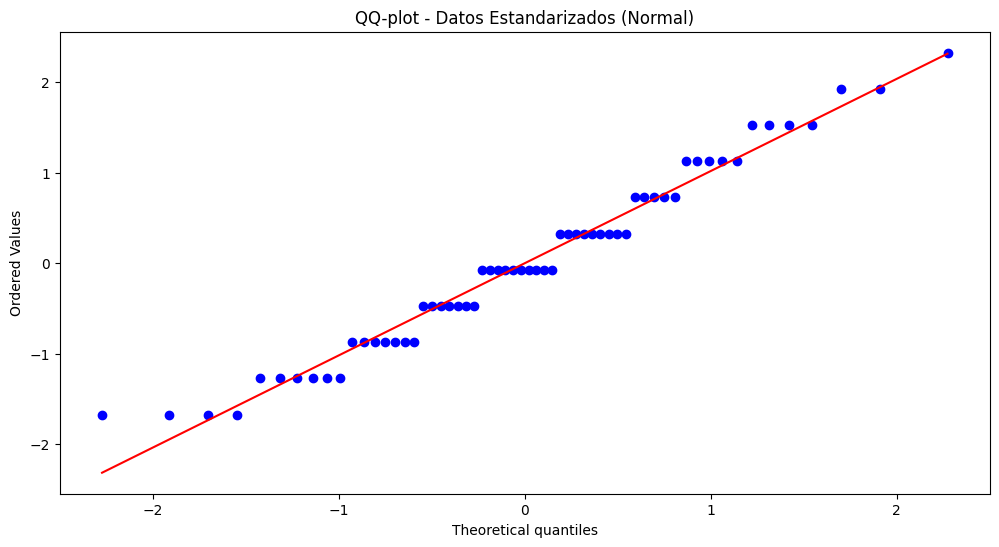

In [60]:
# Gráfico QQ-plot (Estandarizado con distribución normal)
df_standardized = (df - np.mean(df.values)) / np.std(df.values)
plt.figure(figsize=(12, 6))
stats.probplot(df_standardized.values.ravel(), plot=plt)
plt.title("QQ-plot - Datos Estandarizados (Normal)")
plt.show()

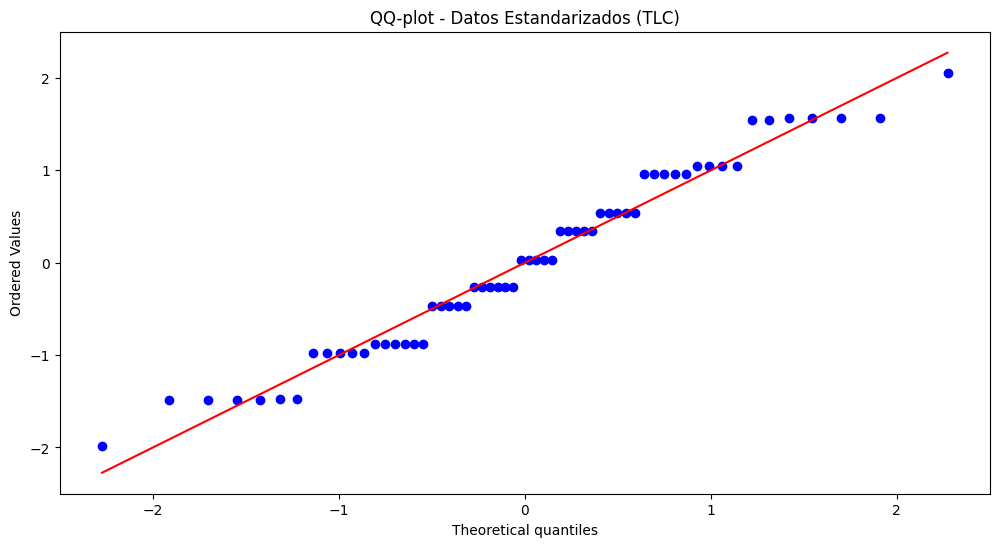

In [61]:
# Estandarizamos los datos utilizando el Teorema del Límite Central
df_tlc = (df - df.mean()) / (df.std())

# Gráfico QQ-plot (Estandarizado siguiendo el TLC)
plt.figure(figsize=(12, 6))
stats.probplot(df_tlc.values.ravel(), plot=plt)
plt.title("QQ-plot - Datos Estandarizados (TLC)")
plt.show()

In [62]:
# Test de Kolmogorov (Estandarizado con distribución normal)
normal_kstest_df = stats.kstest(df_standardized.values.flatten(), 'norm')

# Test de Kolmogorov (Estandarizado siguiendo el TLC)
tlc_kstest_df = stats.kstest(df_tlc.values.flatten(), 'norm')

print('Normal: ', normal_kstest_df)
print('TLC: ', tlc_kstest_df)

Normal:  KstestResult(statistic=0.0958968816029993, pvalue=0.6050408185687179, statistic_location=-0.07333496301728606, statistic_sign=1)
TLC:  KstestResult(statistic=0.1099045797060012, pvalue=0.4324577972274043, statistic_location=-0.8775447188558786, statistic_sign=1)


Al comparar los resultados de las pruebas normal y de TLC, se observa que las distribuciones de los conjuntos de datos son similares. La prueba normal, al tener un valor "p" más alto, proporciona una evidencia más sólida para aceptar la hipótesis de similitud entre las distribuciones. Por lo tanto, la prueba normal sugiere una mayor confianza en la similitud de las distribuciones de datos.

In [67]:
# Intervalo de confianza usando distribución normal en datos estandarizados (normal)
conf_level = 0.99
alpha = 1 - conf_level

mean_combined = np.mean(df_standardized.values)
std_combined = np.std(df_standardized.values)
n_combined = df_standardized.size

# En caso de que no sean normales considera que tienen una distribución t-student.
t_student = stats.t.ppf(1 - alpha / 2, n_combined - 1)

margin_error_combined = t_student * std_combined / np.sqrt(n_combined)
interval_combined = (mean_combined - margin_error_combined,
mean_combined + margin_error_combined)
print(f"Intervalo de confianza del {conf_level * 100}% para el DataFrame completo estandarizado:", interval_combined)


Intervalo de confianza del 99.0% para el DataFrame completo estandarizado: (-0.3436315774640739, 0.3436315774640737)


El intervalo de confianza del 99.0% para el DataFrame completo estandarizado es (-0.3436, 0.3436). Esto significa que podemos estar muy seguros (con un nivel de confianza del 99.0%) de que cualquier valor verdadero en el DataFrame estandarizado estará dentro de este rango.